Covariate data is not provided in this github as it is almost entirely from ArboNET - available on request from https://wwwn.cdc.gov/arbonet/maps/ADB_Diseases_Map/index.html

In [1]:
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
import pandas as pd
import csv
import plot_skygrid
import numpy as np
import dendropy

import os

In [5]:
tree = dendropy.Tree.get(path="../phylogenetic_data/base_skygrid.mcc", schema="nexus", preserve_underscores=True)

In [46]:
def plot_cov_with_skygrid(file, averages=False):

    base_string = file.split(".")[0]
    
    cov_dict = {}

    with open(f"../../data/covariates/{file}") as f:
        data = csv.DictReader(f)
        for l in data:
            lag = int(file.split(".csv")[0].split("_")[1].rstrip("lag"))
            year = int(l['year']) - lag
            cov_dict[year] = float(l['value'])

    if averages:
        cov_dict = moving_average(cov_dict)
            
            
    fig, ax = plt.subplots(1,1, figsize=(20,10))

    ax2 = ax.twinx()

    plt.plot(original['times_in_years'],original['revmean'],color="darkblue", linewidth=3)
    plt.fill_between(original['times_in_years'], original['revlower'], original['revupper'], color="lightblue", alpha=0.5)

    ax2.plot(cov_dict.keys(), cov_dict.values())
    
    plt.savefig(f"../../figures/skygrid_covariate_plots/{base_string}_skygrid.pdf", bbox_inches="tight")
    
    return cov_dict

def moving_average(cov_dict):
    df_dict = defaultdict(list)
    for k,v in cov_dict.items():
        df_dict['year'].append(k)
        df_dict['cov'].append(v)
        
    df = pd.DataFrame(df_dict)
    df['rolling'] = df["cov"].rolling(7).mean()
    
    new_dict = {}
    for i,j in df.iterrows():
        new_dict[j['year']] = j['rolling'] 
        
    return new_dict

horse_1lag.csv
all_1lag.csv
human_2lag.csv
human_0lag.csv
ne_1lag.csv
horse_0lag.csv
all_2lag.csv
all_0lag.csv
horse_2lag.csv
ne_2lag.csv
ne_0lag.csv
human_1lag.csv


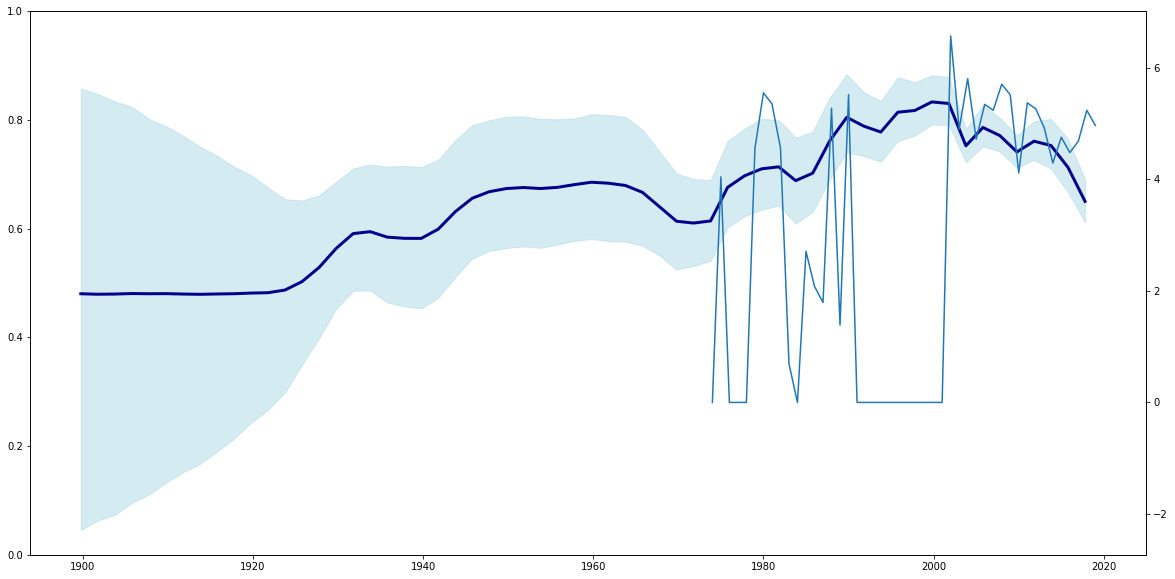

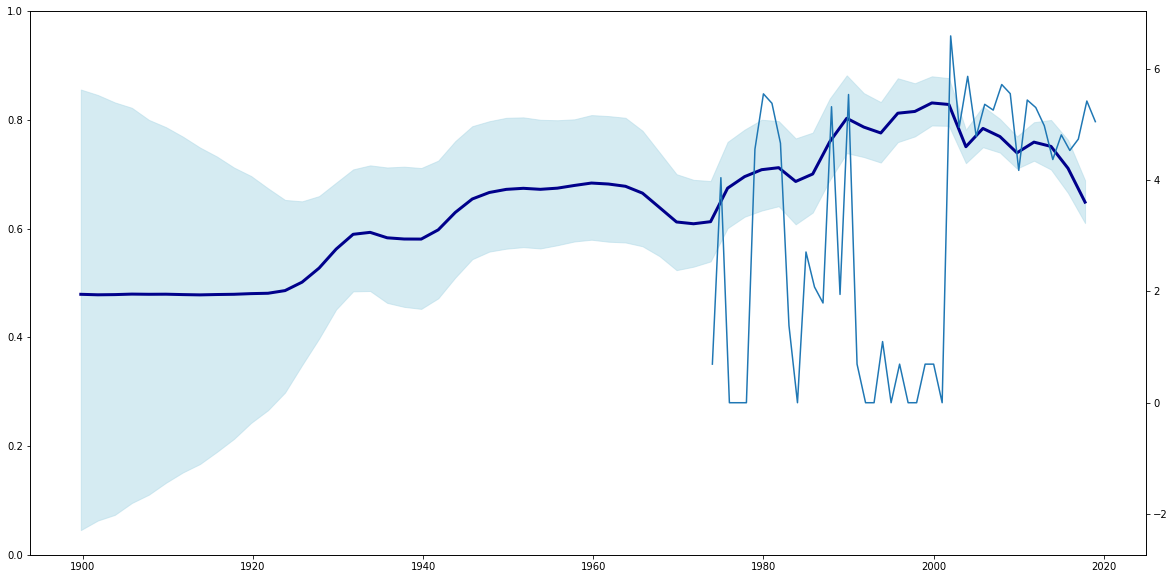

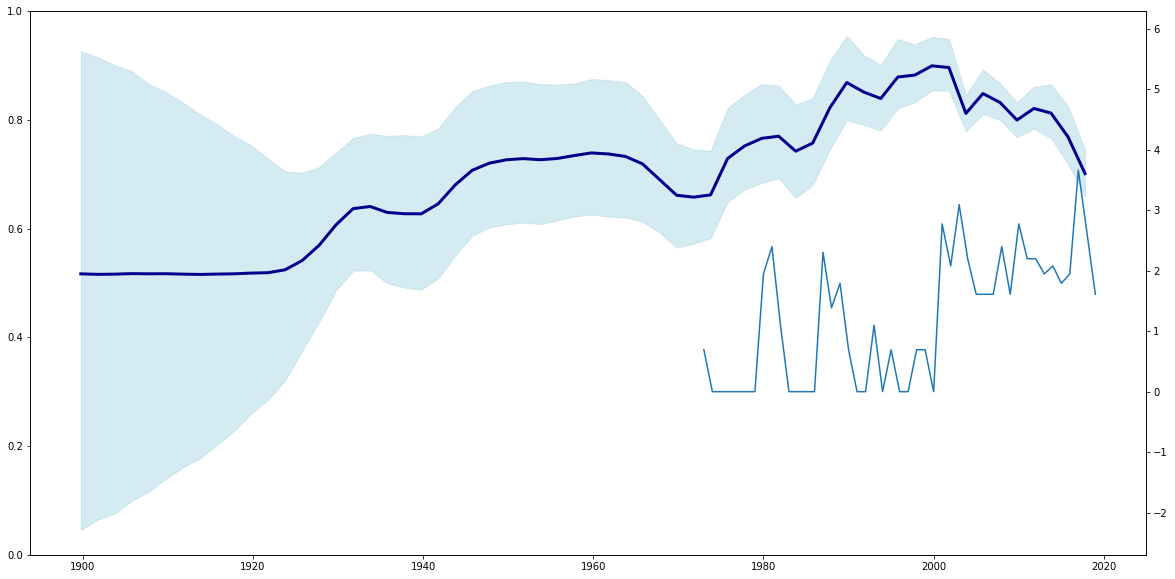

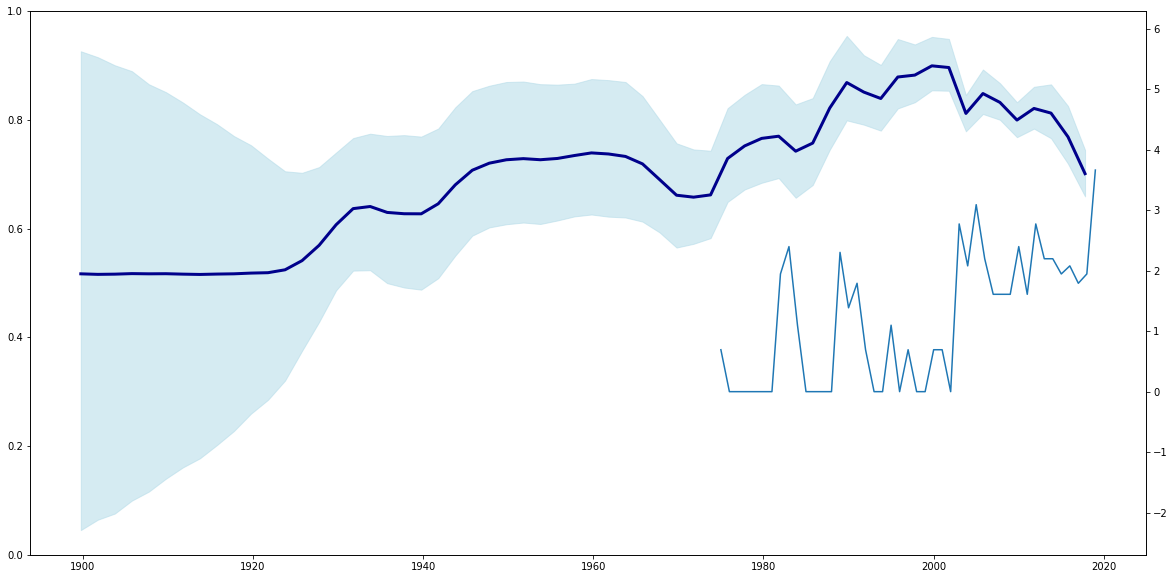

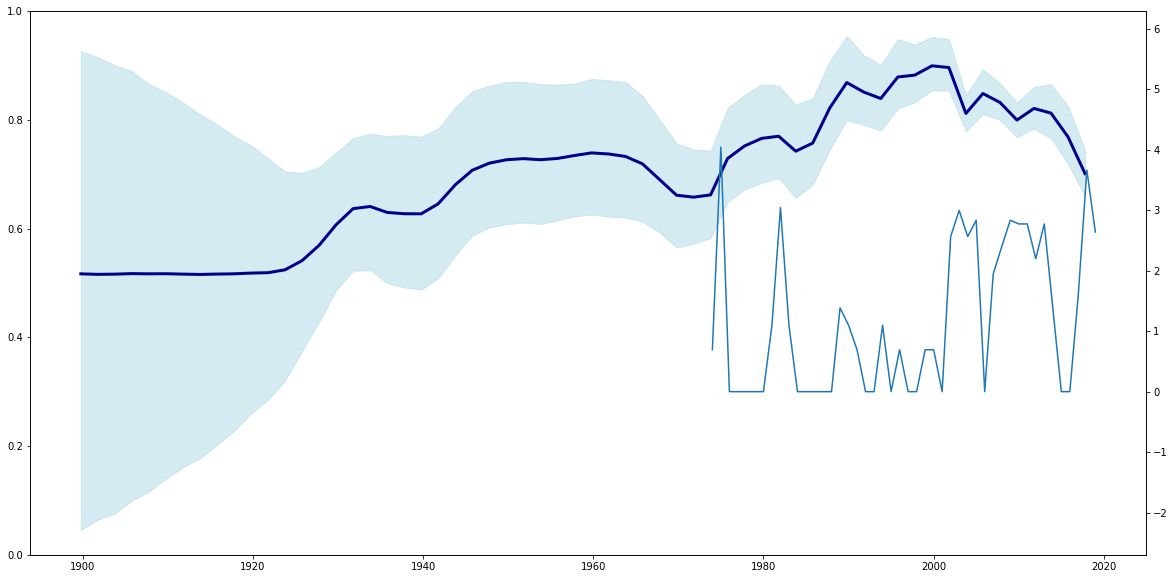

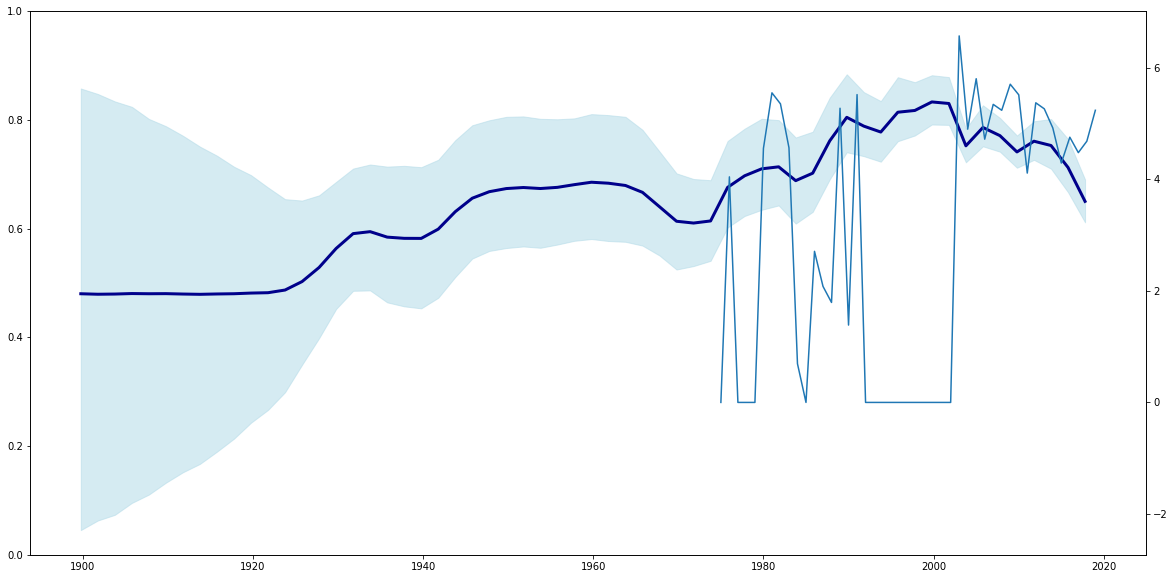

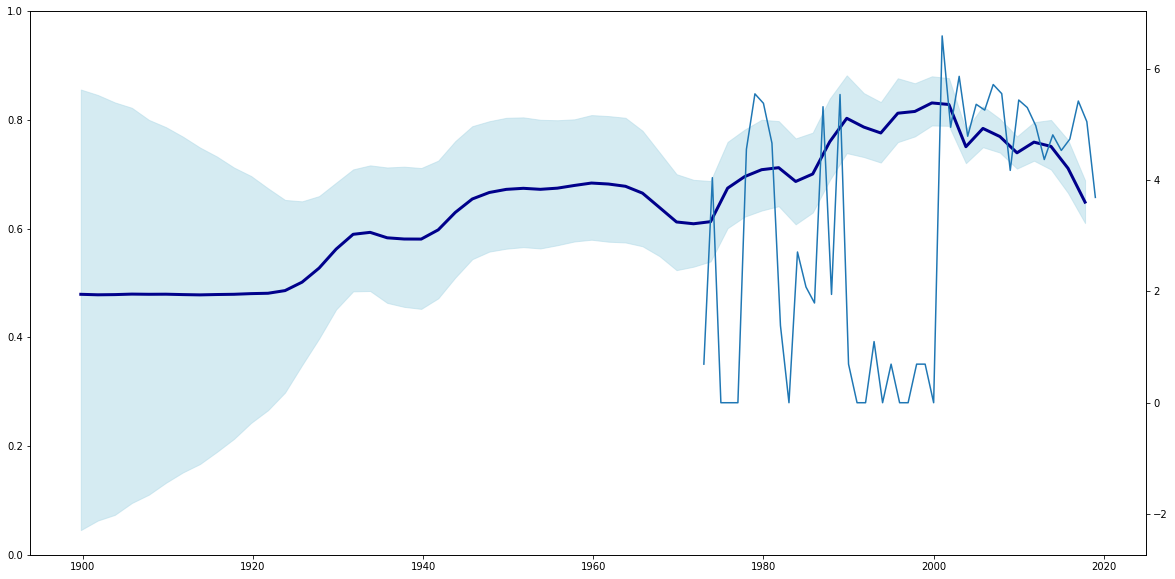

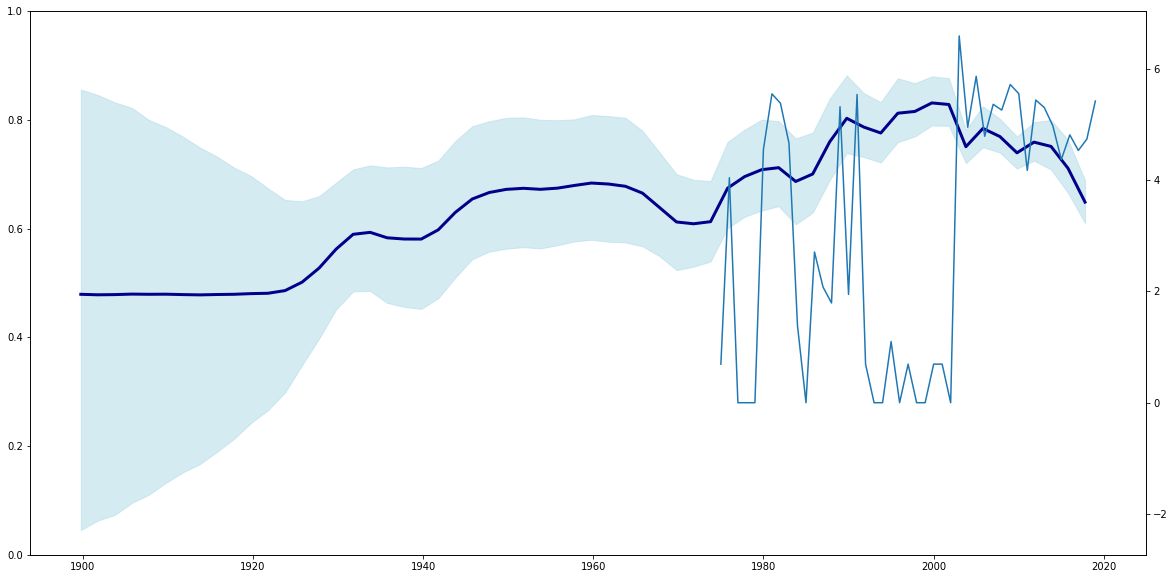

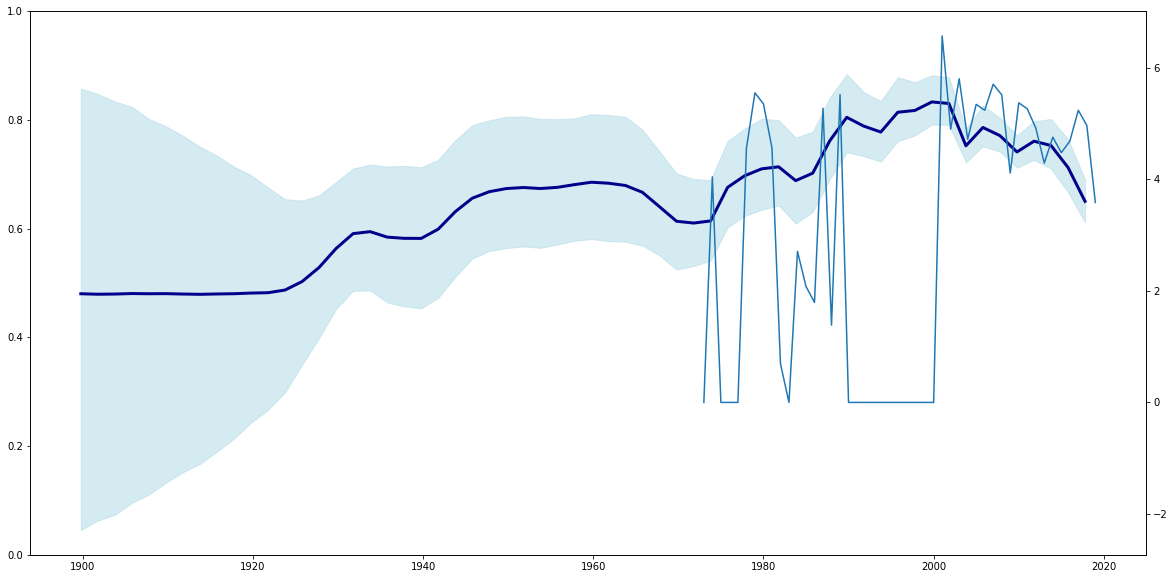

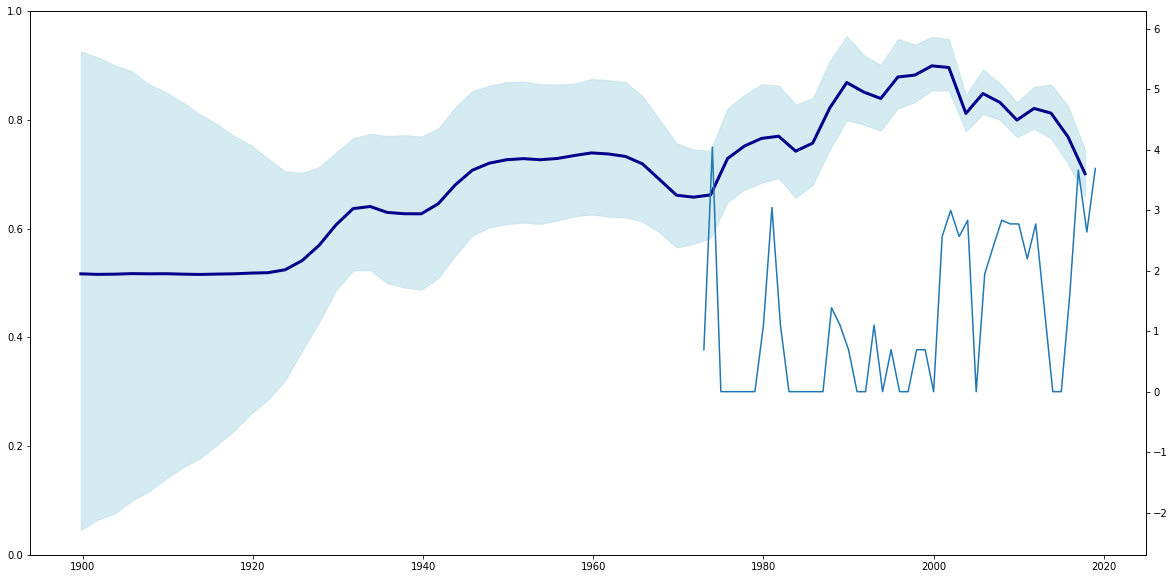

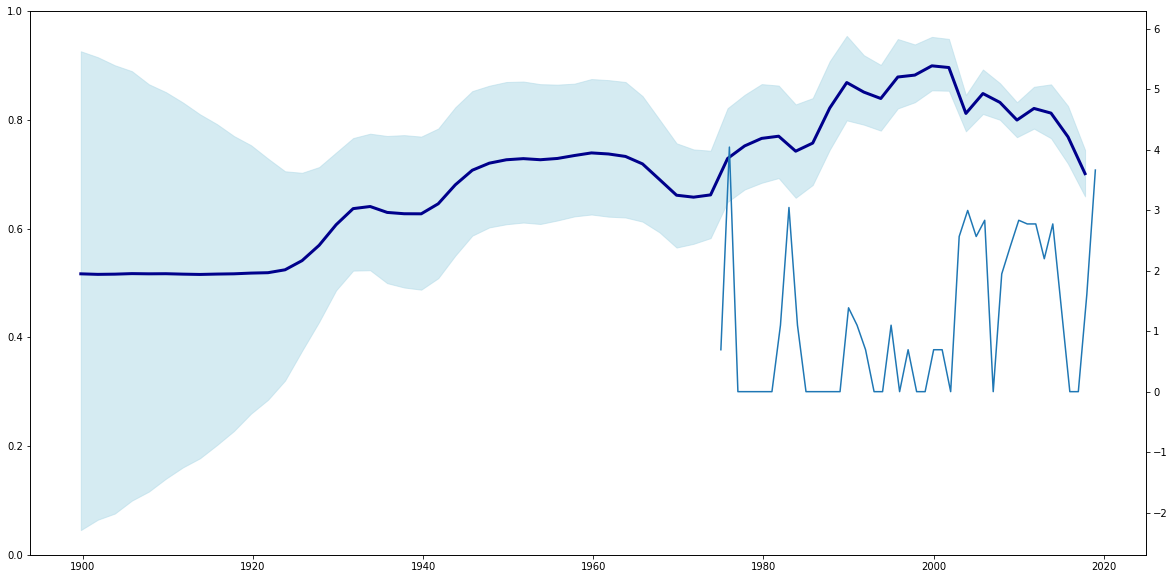

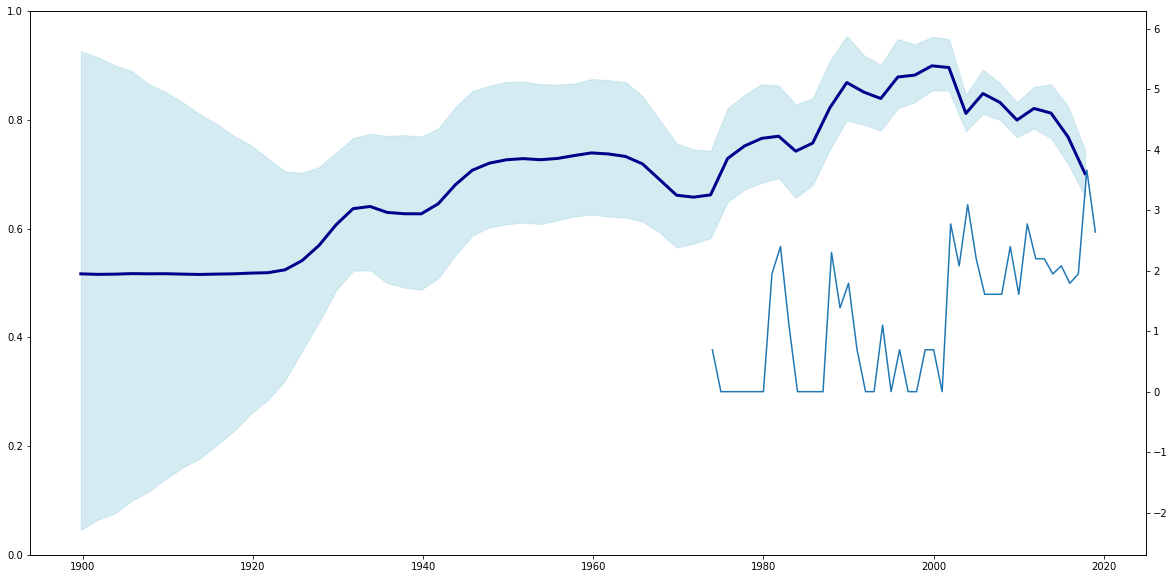

In [20]:
for root, directory, files in os.walk("../../data/covariates/"):
    for file in files:
        if file.endswith(".csv"):
            print(file)
            plot_cov_with_skygrid(file)

horse_1lag.csv
all_1lag.csv
human_2lag.csv
human_0lag.csv
ne_1lag.csv
horse_0lag.csv
all_2lag.csv
all_0lag.csv
horse_2lag.csv
ne_2lag.csv
ne_0lag.csv
human_1lag.csv


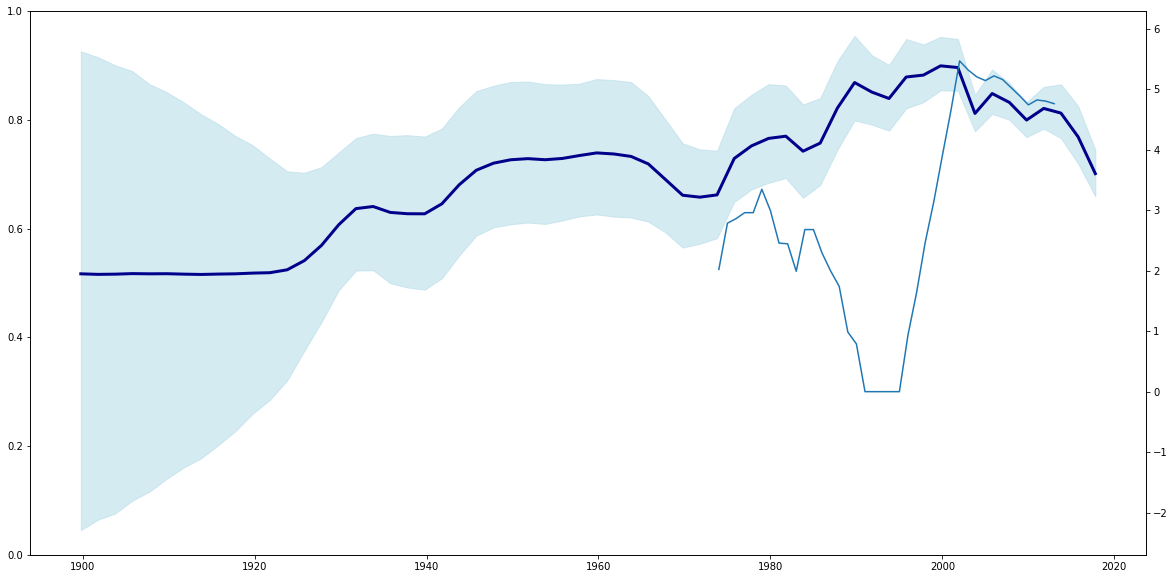

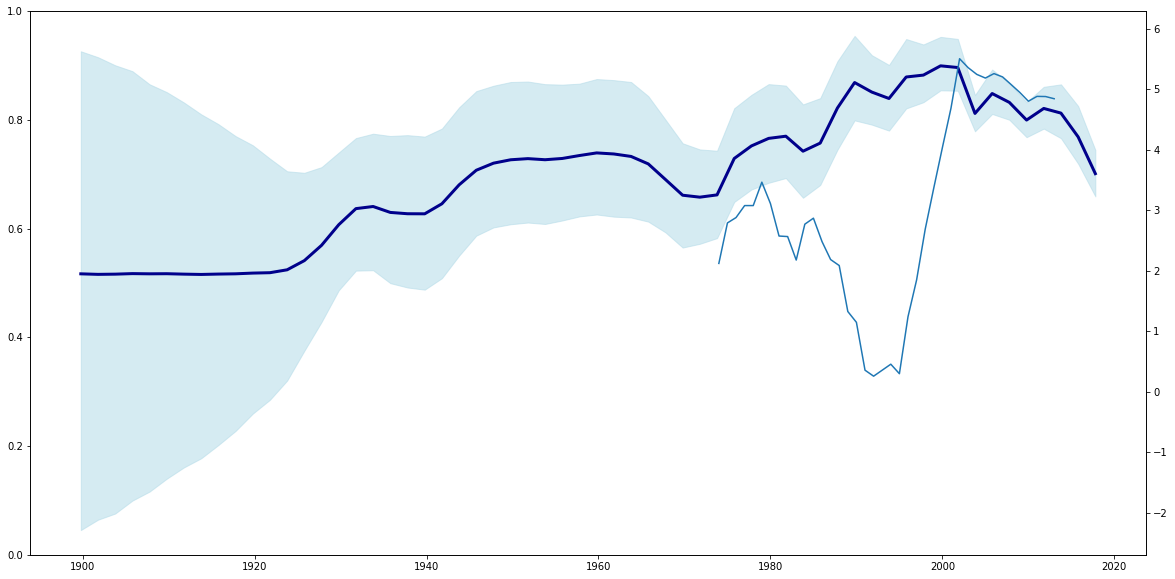

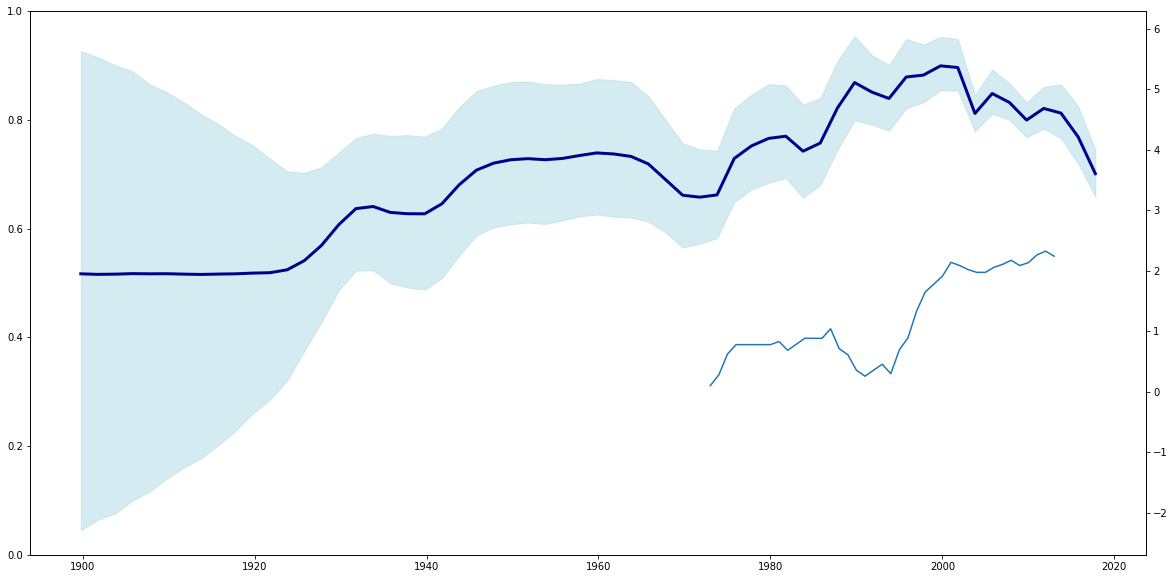

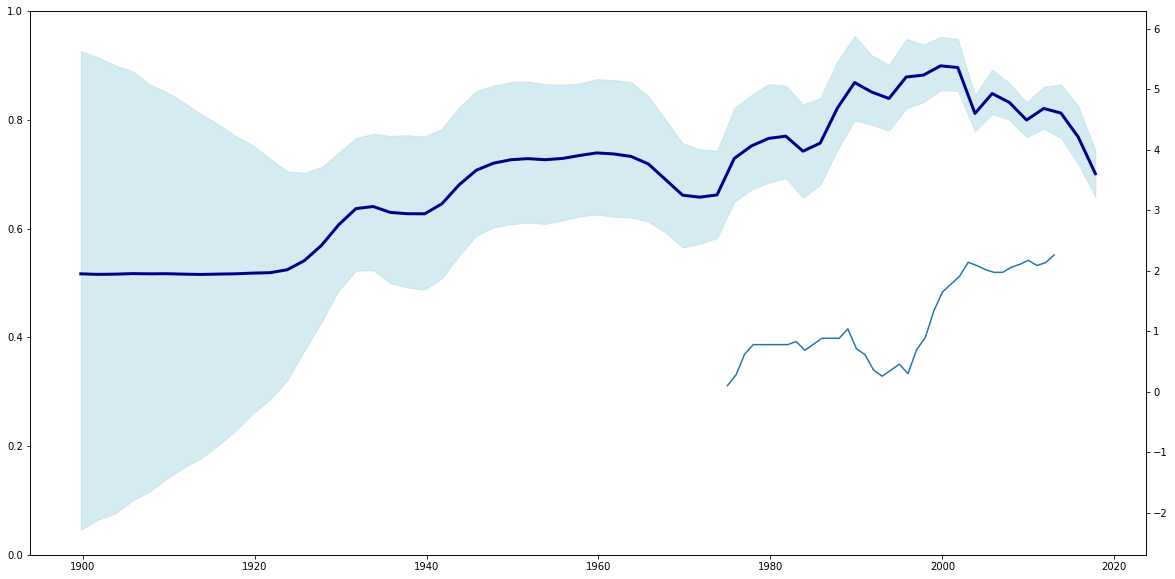

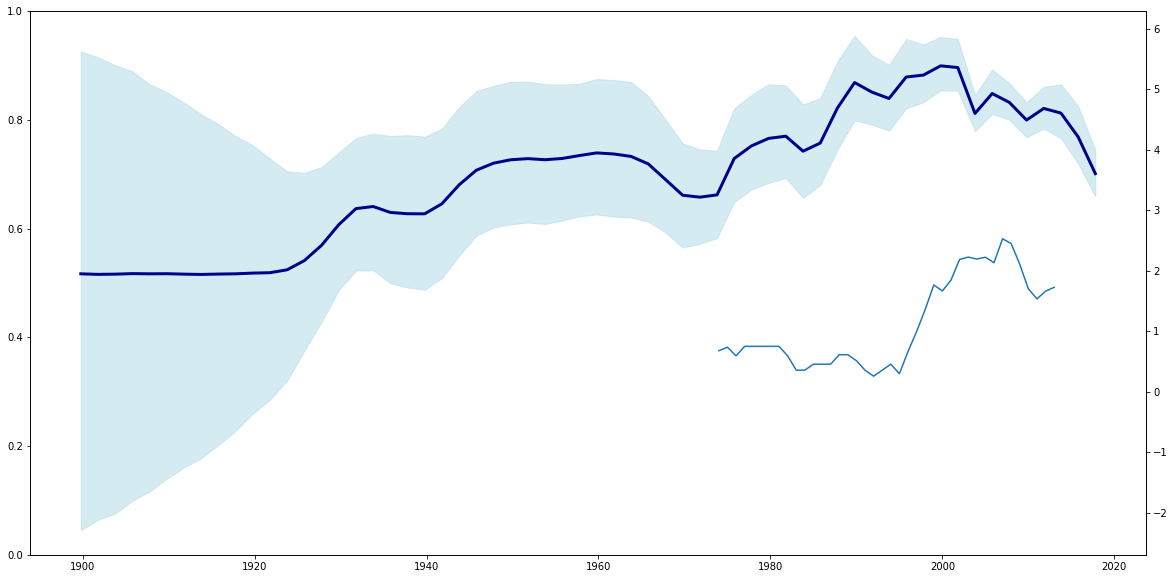

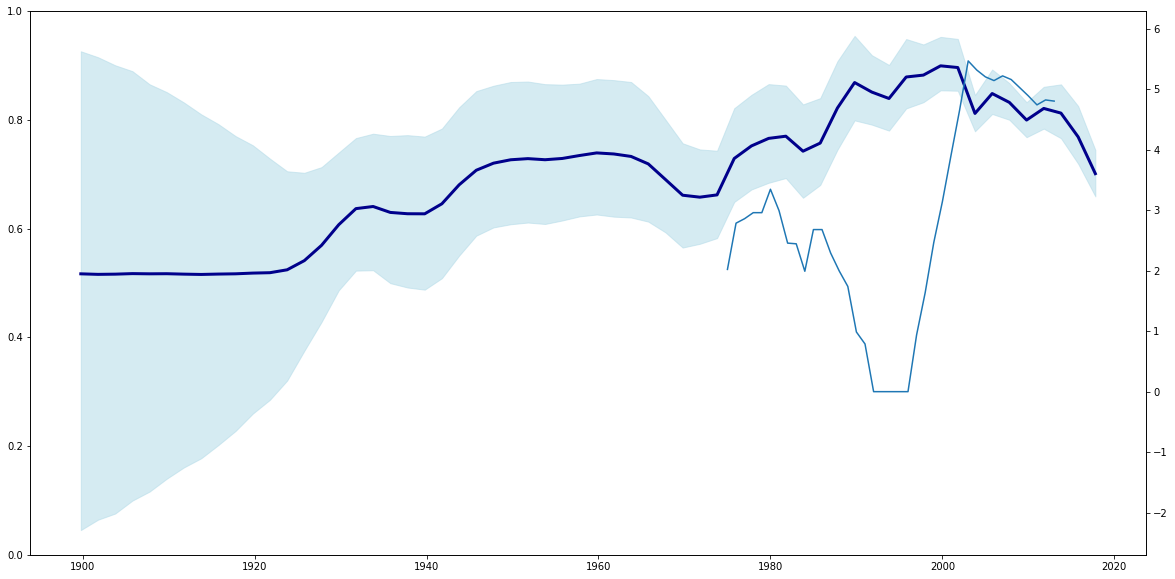

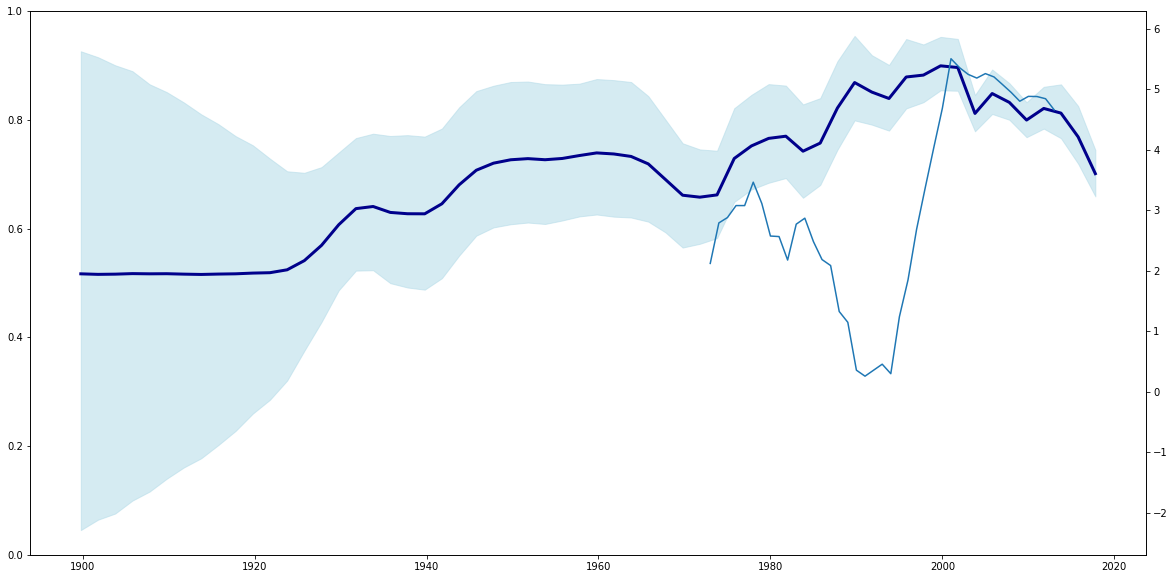

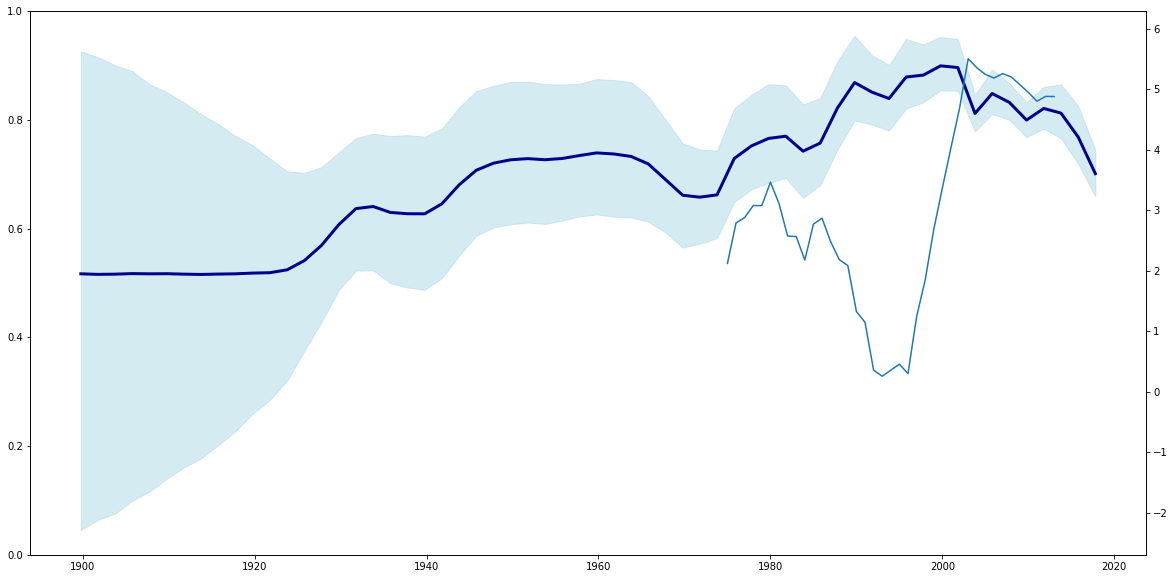

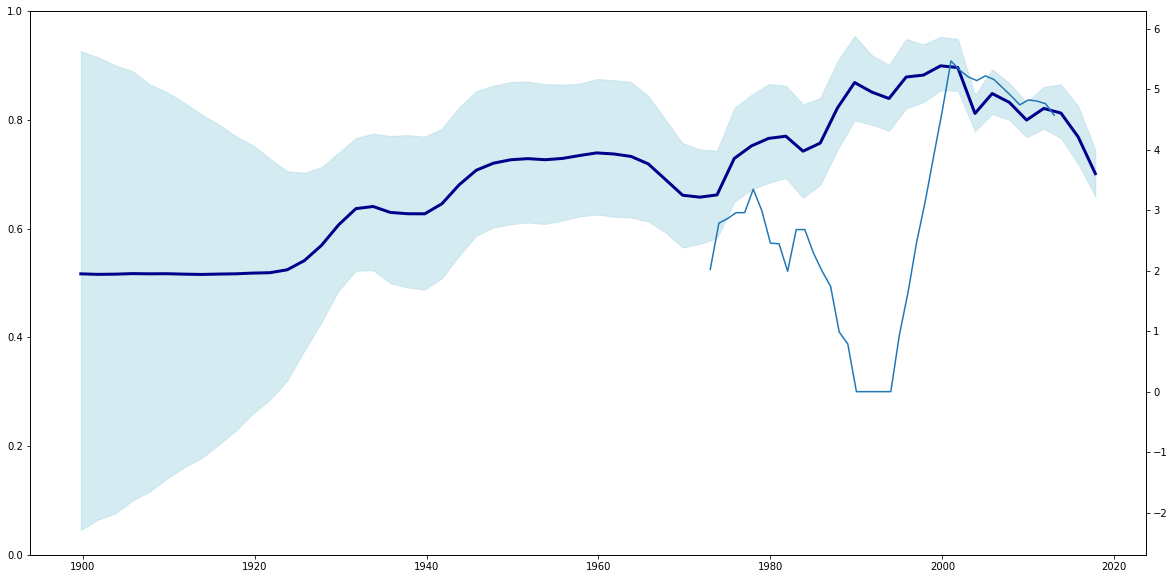

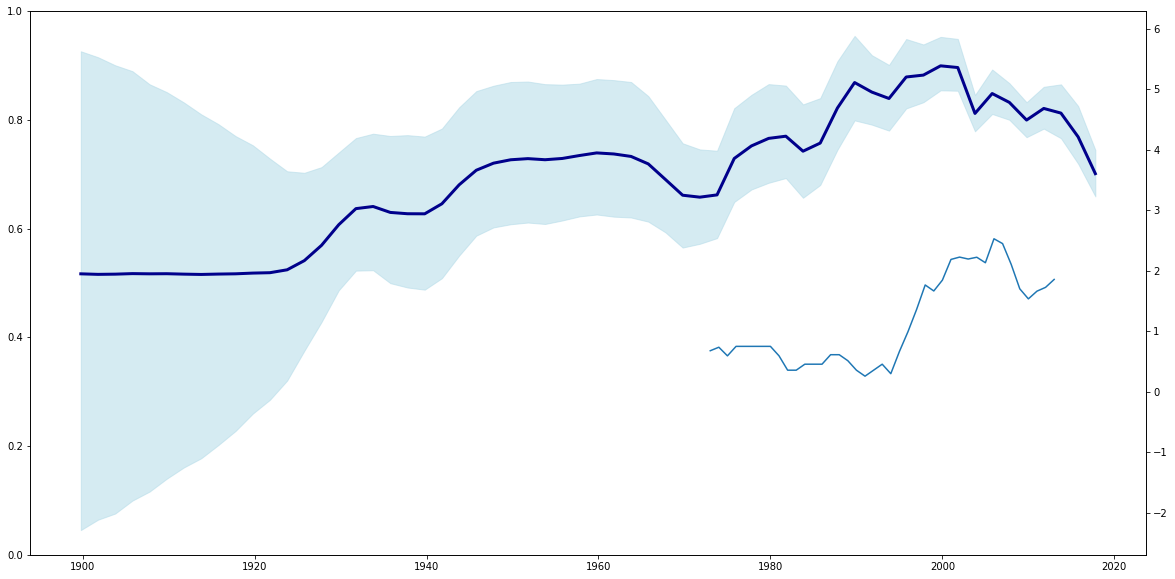

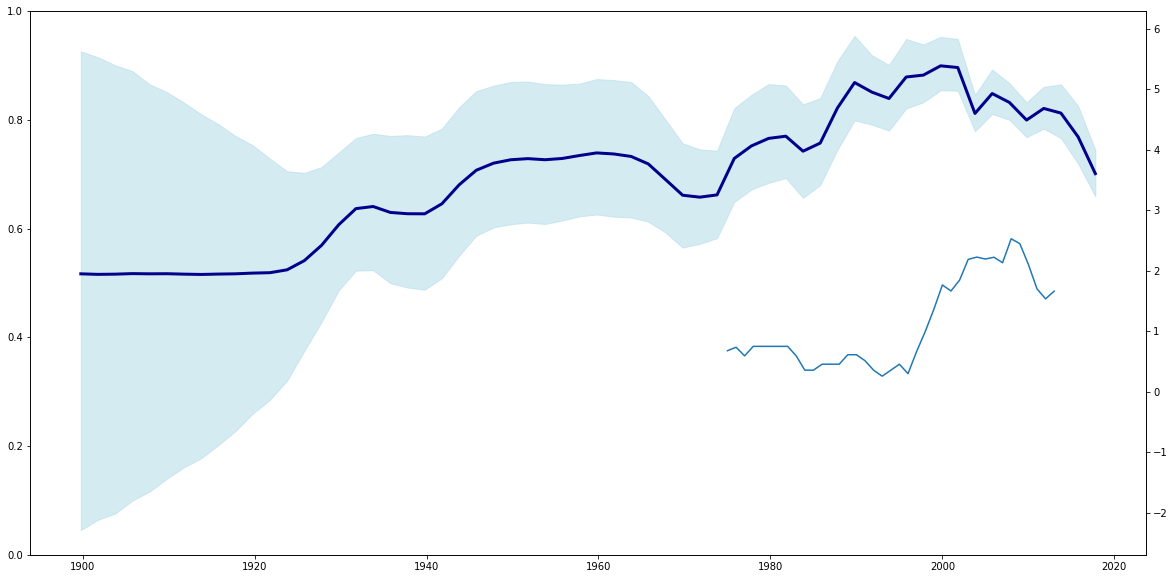

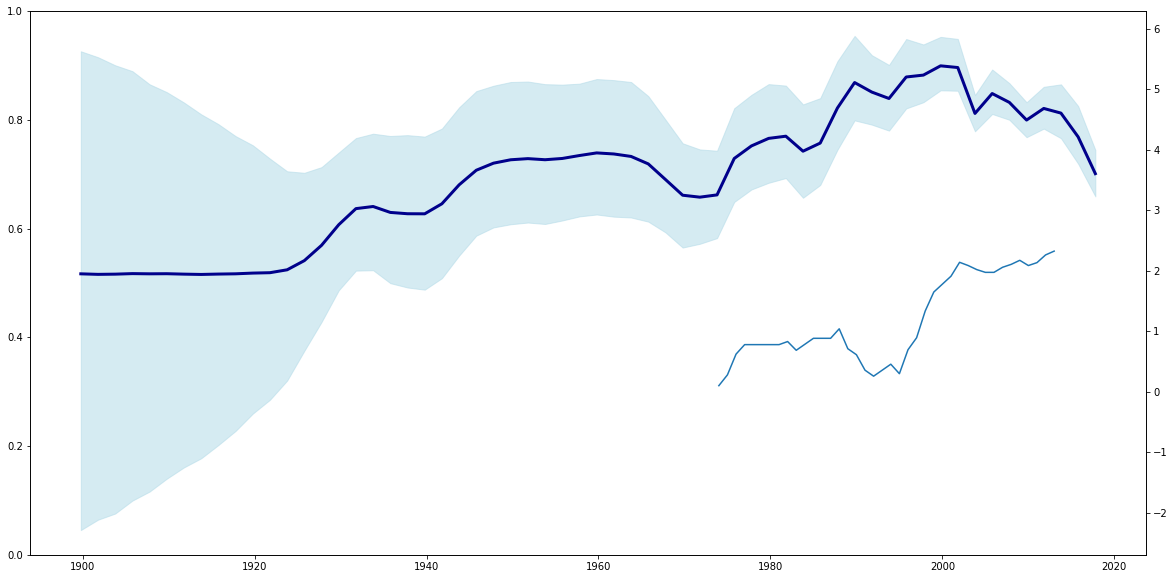

In [47]:
for root, directory, files in os.walk("../../data/covariates/"):
    for file in files:
        if file.endswith(".csv"):
            print(file)
            plot_cov_with_skygrid(file,averages = True)